## Telco-Churn-Customer-Prediction

In [1]:
# Import libraries for EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load The Dataset and see it
data = pd.read_csv('Telco-Customer-Churn.csv')
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# see the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

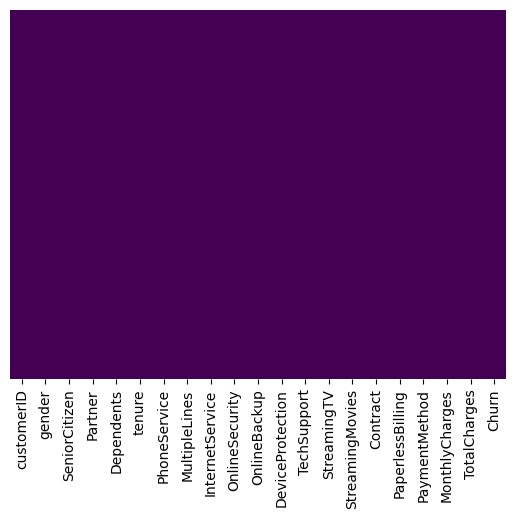

In [4]:
# see the null values by visually by heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')



In [5]:
# hence there is no null values

# Check the columns 
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### first of all we check interaction between churn and all other columns  

In [7]:
# we can drop Customer id because it has no no effect on churn
df.drop(['customerID'], axis = 1, inplace = True)

In [8]:
# Now we can drop columns because it has no effect on churn 
df.drop(['InternetService'], axis = 1, inplace = True)
df.drop(['OnlineBackup'], axis = 1, inplace = True)
df.drop(['Contract'], axis = 1, inplace = True)
df.drop(['PaymentMethod'], axis = 1, inplace = True)

In [9]:
# gender is effective on churn but it cannot change 0 and 1   
df.drop(['gender'], axis = 1, inplace = True)

In [10]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,No,No,No,No,No,Yes,29.85,29.85,No
1,0,No,No,34,Yes,No,Yes,Yes,No,No,No,No,56.95,1889.5,No
2,0,No,No,2,Yes,No,Yes,No,No,No,No,Yes,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,Yes,Yes,Yes,No,No,No,42.30,1840.75,No
4,0,No,No,2,Yes,No,No,No,No,No,No,Yes,70.70,151.65,Yes


In [11]:
#Now we can all yes and no in 1 and 0 
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})    
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})    
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
# Check the null values
df.isnull().sum()


SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
OnlineSecurity      1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
PaperlessBilling       0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

<Axes: >

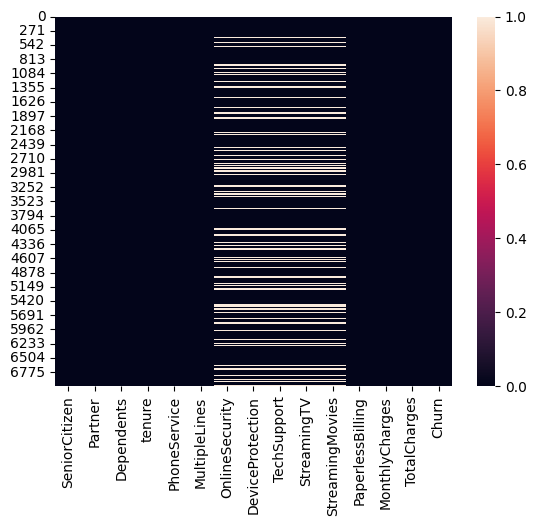

In [16]:
sns.heatmap(df.isnull())

In [17]:
# we can impute the null values by mean, median and mode methods
df['OnlineSecurity'] = df['OnlineSecurity'].fillna(0)
df['DeviceProtection'] = df['DeviceProtection'].fillna(0)
df['TechSupport'] = df['TechSupport'].fillna(0)
df['StreamingTV'] = df['StreamingTV'].fillna(0)
df['StreamingMovies'] = df['StreamingMovies'].fillna(0)

In [19]:
# Now check
df['OnlineSecurity'] = df['OnlineSecurity'].fillna(0)
df['DeviceProtection'] = df['DeviceProtection'].fillna(0)
df['TechSupport'] = df['TechSupport'].fillna(0)
df['StreamingTV'] = df['StreamingTV'].fillna(0)
df['StreamingMovies'] = df['StreamingMovies'].fillna(0)

In [20]:
# Now check
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# check the dtypes
df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity      float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [21]:
# Now  we convert all the float and object columns into numeric
df['OnlineSecurity'] = pd.to_numeric(df['OnlineSecurity'], errors='coerce')
df['DeviceProtection'] = pd.to_numeric(df['DeviceProtection'], errors='coerce')
df['TechSupport'] = pd.to_numeric(df['TechSupport'], errors='coerce')
df['StreamingTV'] = pd.to_numeric(df['StreamingTV'], errors='coerce')
df['StreamingMovies'] = pd.to_numeric(df['StreamingMovies'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
 



In [22]:
#now check
df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity      float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [24]:
#perhaps its nnot show but will be helpfull in future
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [26]:
#check the null values
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
# impute the values of total charges by mean method
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)   

C:\Users\CYBER-LAPTOP\AppData\Local\Temp\ipykernel_6360\3867565684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [28]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
# Correlation matrix
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102395,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318812,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.824757,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.112851,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468689,0.040102
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412245,-0.171226
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522462,-0.066160
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.432480,-0.164674
StreamingTV,0.105378,0.124666,-0.016558,0.279756,-0.022574,0.257152,0.176207,0.390874,0.278070,1.000000,0.533094,0.223841,0.629603,0.515314,0.063228


### VIsualization

In [31]:
corr_matrix = df.corr()

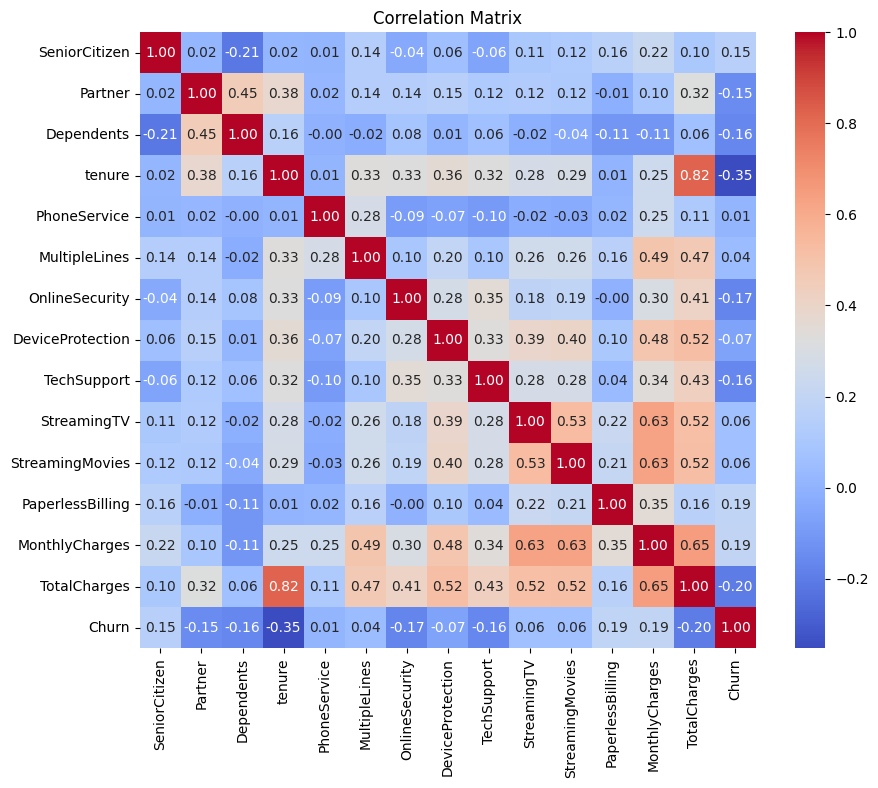

In [32]:
# Correlation matrix by graph
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

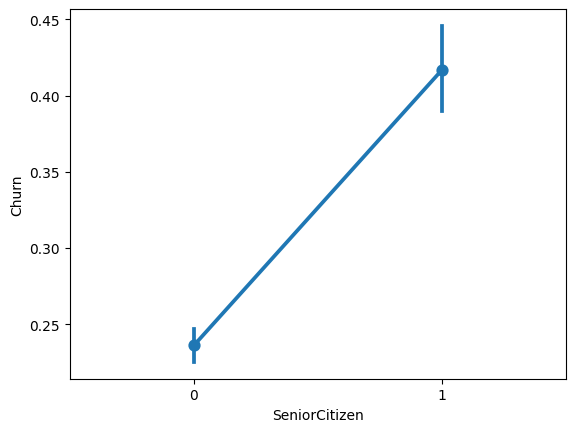

In [34]:
#Point  plot against senior citizen and churn rate
sns.pointplot(x='SeniorCitizen', y='Churn', data=df)

<Axes: xlabel='Partner', ylabel='Churn'>

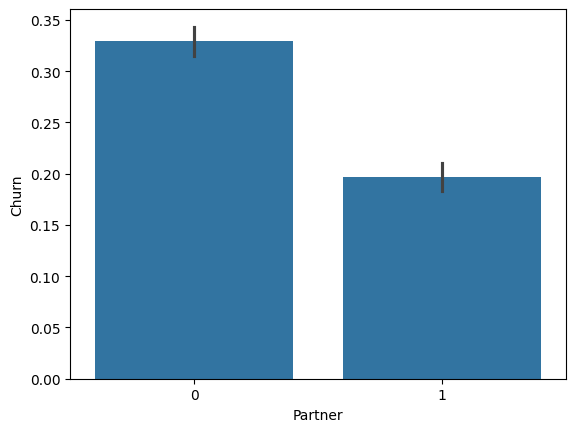

In [35]:
# bar plot against partner and churn rate
sns.barplot(x='Partner', y='Churn', data=df)

<Axes: xlabel='Dependents', ylabel='Churn'>

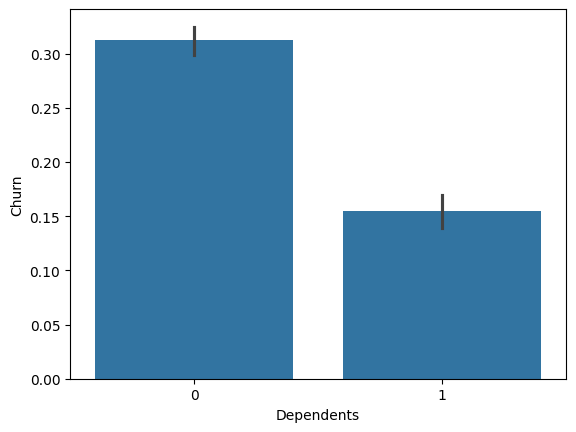

In [36]:
# Bar plot against Dependents and churn rate
sns.barplot(x='Dependents', y='Churn', data=df)


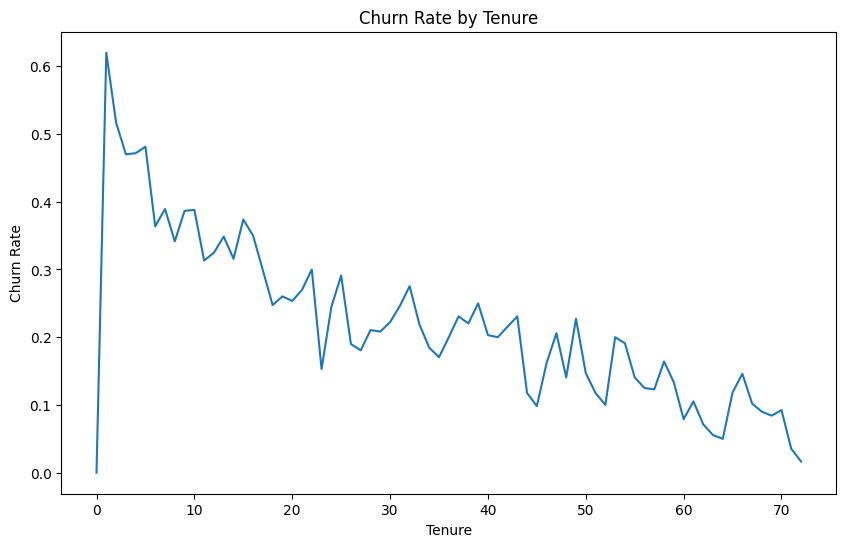

In [37]:
#line plot between tenure and churnrate
plt.figure(figsize=(10, 6))
churn_rate = df.groupby('tenure')['Churn'].mean()
plt.plot(churn_rate)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()


<Axes: xlabel='PhoneService', ylabel='Churn'>

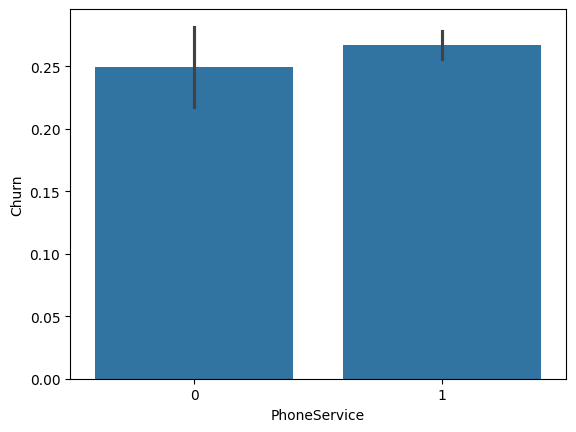

In [38]:
#Bar plot agaist phone service and churn rate
sns.barplot(x='PhoneService', y='Churn', data=df)

<Axes: xlabel='MultipleLines', ylabel='Churn'>

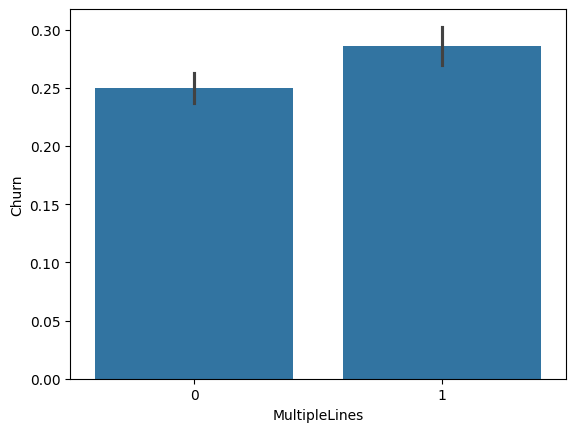

In [39]:
# Bar plot between multiplelines and churnrate
sns.barplot(x='MultipleLines', y='Churn', data=df)

<Axes: xlabel='OnlineSecurity', ylabel='Churn'>

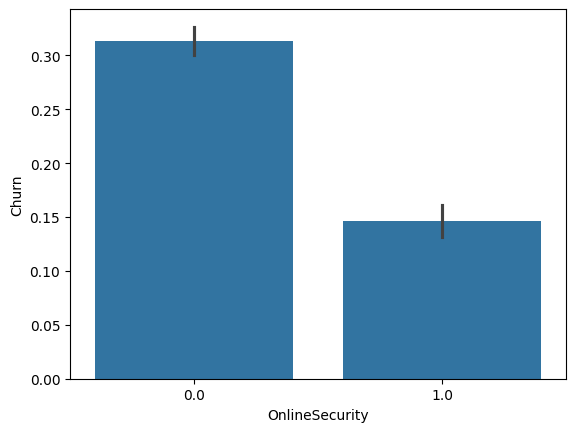

In [40]:
#barplot against online security and churn rate
sns.barplot(x='OnlineSecurity', y='Churn', data=df)

<Axes: xlabel='DeviceProtection', ylabel='Churn'>

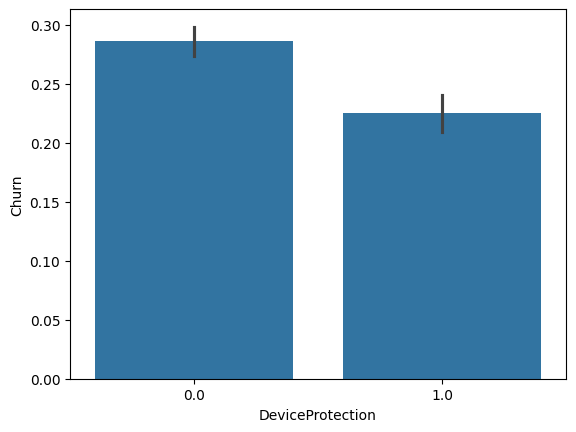

In [41]:
#barplot against device protection and churn rate
sns.barplot(x='DeviceProtection', y='Churn', data=df)


<Axes: xlabel='TechSupport', ylabel='Churn'>

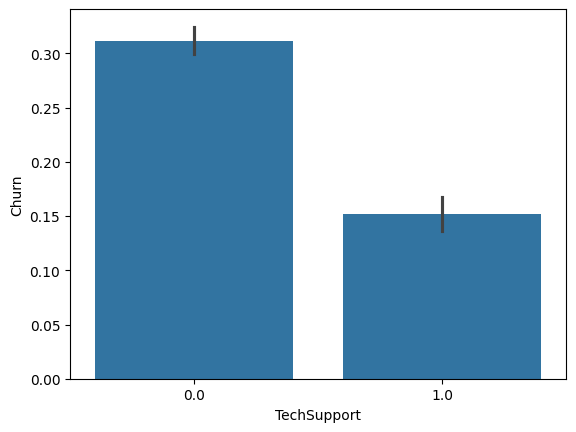

In [42]:
#barplot against tech support and churn rate
sns.barplot(x='TechSupport', y='Churn', data=df)

<Axes: xlabel='StreamingTV', ylabel='Churn'>

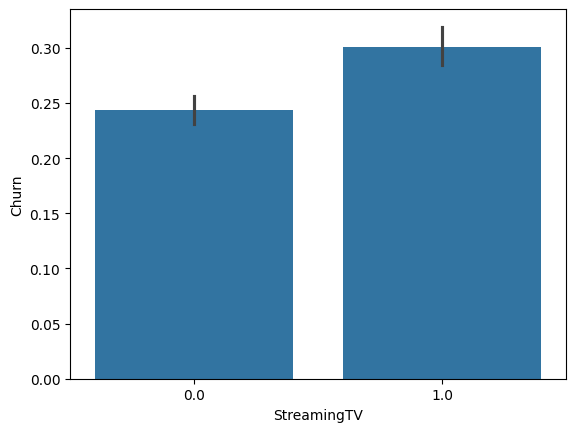

In [43]:
#barplot against streaming tv and churn rate
sns.barplot(x='StreamingTV', y='Churn', data=df)

<Axes: xlabel='StreamingMovies', ylabel='Churn'>

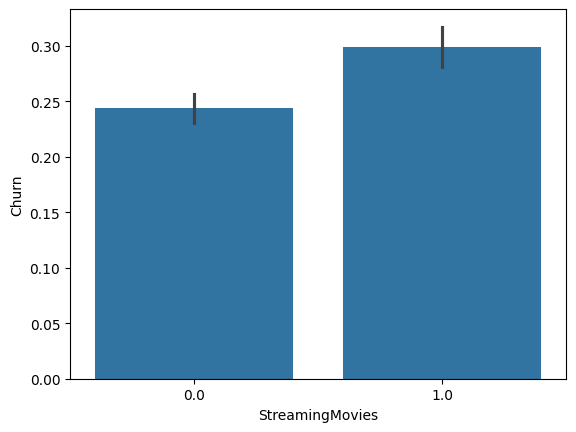

In [44]:
#barplot against streaming movies and churn rate
sns.barplot(x='StreamingMovies', y='Churn', data=df)

<Axes: xlabel='PaperlessBilling', ylabel='Churn'>

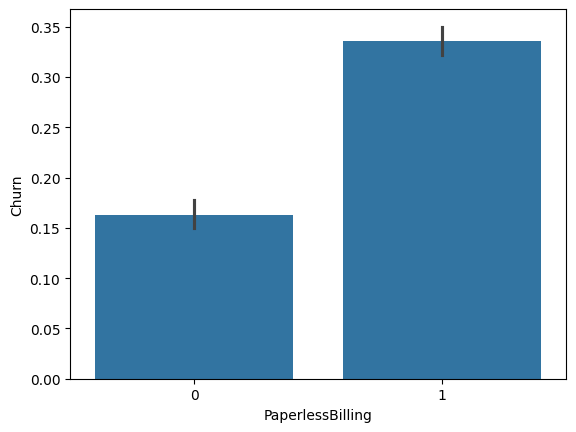

In [45]:
#barplot against paperless billing and churn rate
sns.barplot(x='PaperlessBilling', y='Churn', data=df)

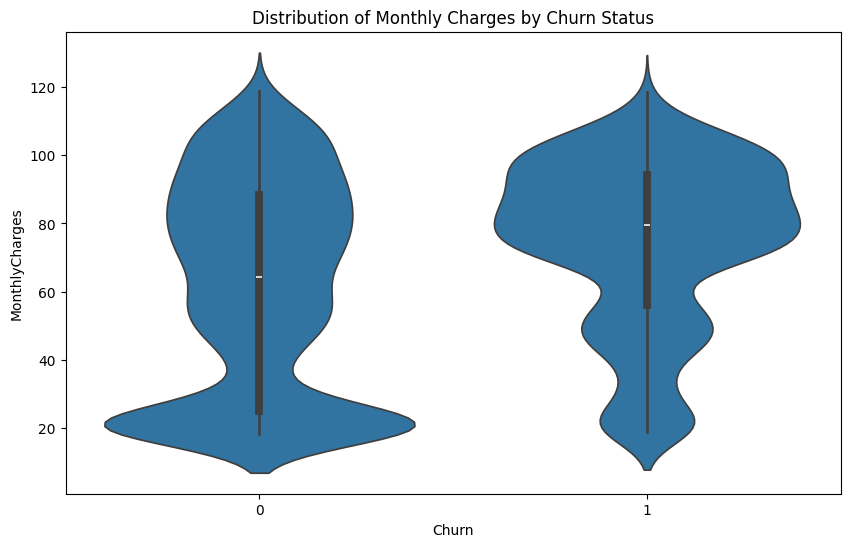

In [46]:
# violinplot between monthly charges and churn arte
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()


### Machine Learning 

In [47]:
# import libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [48]:
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[943  93]
 [166 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [67]:
# result of logistic regression
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [54]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [61]:
# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Fit the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [62]:
# Predict on the test data
y_pred = dtree.predict(X_test)


In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.79
[[933 103]
 [186 187]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



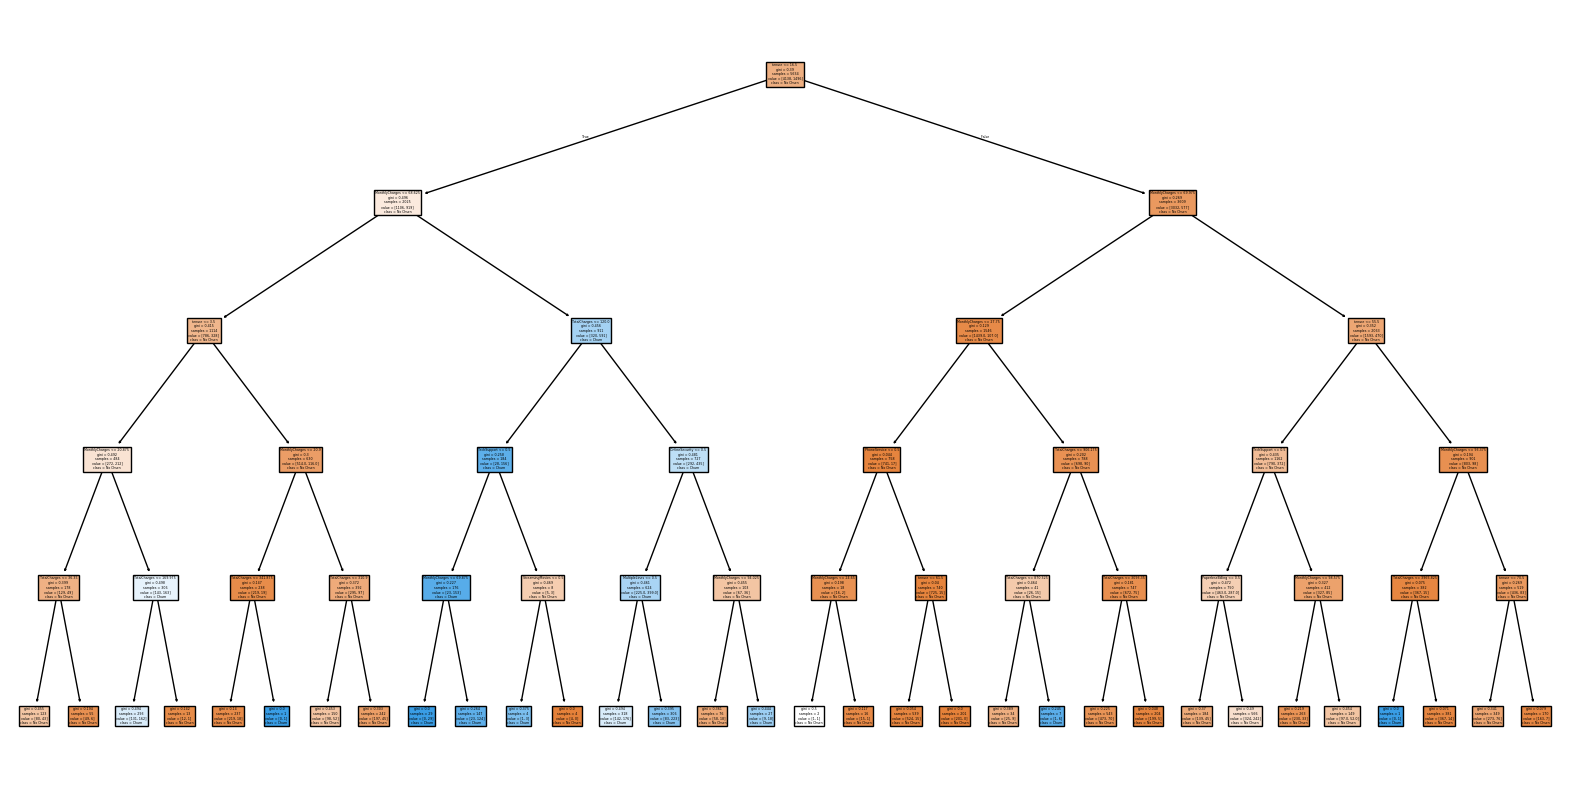

In [64]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

